In [1]:
%load_ext autoreload
%autoreload 2

import numpy
import matplotlib as mpl
import matplotlib.pyplot as plt

import torch
from torch import nn
from torch.nn import functional as F

from torch_geometric.datasets import TUDataset
from torch_geometric.loader import DataLoader
from torch_geometric import utils, nn as gnn, transforms as T
from torch_geometric.nn import GCNConv
plt.style.use("seaborn-v0_8")

/env_dl/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
tu_ds = TUDataset("/mnt/dl/datasets/gnn/tudataset", name="ENZYMES", use_node_attr=True)

In [3]:
tu_ds

ENZYMES(600)

In [4]:
tu_ds.num_node_attributes


18

In [5]:
tu_ds.x

tensor([[11.0000, 15.8870, 37.7800,  ...,  1.0000,  0.0000,  0.0000],
        [11.0000, 16.3629, 40.3800,  ...,  1.0000,  0.0000,  0.0000],
        [16.0000, 21.3951, 63.3500,  ...,  1.0000,  0.0000,  0.0000],
        ...,
        [ 4.0000, 10.2377, 20.7000,  ...,  0.0000,  1.0000,  0.0000],
        [ 6.0000, 16.4543, 23.0300,  ...,  0.0000,  1.0000,  0.0000],
        [ 6.0000, 16.9627, 29.1600,  ...,  0.0000,  1.0000,  0.0000]])

In [6]:
tu_ds.x.shape

torch.Size([19580, 21])

In [7]:
tu_ds.num_classes

6

In [8]:
tu_ds[0]

Data(edge_index=[2, 168], x=[37, 21], y=[1])

In [9]:
tu_ds[500]

Data(edge_index=[2, 160], x=[67, 21], y=[1])

In [10]:
tu_ds[500].num_edge_features

0

In [11]:
tu_loader = DataLoader(tu_ds, batch_size=32)

In [12]:
l = next(iter(tu_loader))

In [13]:
l

DataBatch(edge_index=[2, 4264], x=[1069, 21], y=[32], batch=[1069], ptr=[33])

In [14]:
l.batch

tensor([ 0,  0,  0,  ..., 31, 31, 31])

In [15]:
tu_ds[10]

Data(edge_index=[2, 12], x=[4, 21], y=[1])

In [16]:
torch.argwhere(l.batch == 11).squeeze()

tensor([329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342])

In [17]:
l.x[torch.argwhere(l.batch == 11).squeeze()]

tensor([[ 7.0000e+00,  1.0329e+01,  2.7880e+01, -1.8000e-01,  1.2740e+00,
          6.7100e+01,  3.0000e+00,  0.0000e+00,  4.0000e+00,  4.0000e+00,
          1.0000e+00,  2.0000e+00,  2.0000e+00,  1.0000e+00,  4.0000e+00,
          3.0000e+00,  0.0000e+00,  4.0000e+00,  1.0000e+00,  0.0000e+00,
          0.0000e+00],
        [ 6.0000e+00,  9.1068e+00,  2.3050e+01, -5.0000e-01,  1.0240e+00,
          5.3700e+01,  1.0000e+00,  4.0000e+00,  1.0000e+00,  3.0000e+00,
          1.0000e+00,  2.0000e+00,  2.0000e+00,  1.0000e+00,  3.0000e+00,
          0.0000e+00,  5.0000e+00,  1.0000e+00,  1.0000e+00,  0.0000e+00,
          0.0000e+00],
        [ 6.0000e+00,  1.4947e+01,  1.9730e+01,  2.2300e+00,  9.1100e-01,
          4.3900e+01,  2.0000e+00,  3.0000e+00,  1.0000e+00,  1.0000e+00,
          2.0000e+00,  3.0000e+00,  3.0000e+00,  2.0000e+00,  1.0000e+00,
          2.0000e+00,  3.0000e+00,  1.0000e+00,  0.0000e+00,  1.0000e+00,
          0.0000e+00],
        [ 6.0000e+00,  1.5697e+01,  2.3020e

In [18]:
tu_ds[11].x

tensor([[ 7.0000e+00,  1.0329e+01,  2.7880e+01, -1.8000e-01,  1.2740e+00,
          6.7100e+01,  3.0000e+00,  0.0000e+00,  4.0000e+00,  4.0000e+00,
          1.0000e+00,  2.0000e+00,  2.0000e+00,  1.0000e+00,  4.0000e+00,
          3.0000e+00,  0.0000e+00,  4.0000e+00,  1.0000e+00,  0.0000e+00,
          0.0000e+00],
        [ 6.0000e+00,  9.1068e+00,  2.3050e+01, -5.0000e-01,  1.0240e+00,
          5.3700e+01,  1.0000e+00,  4.0000e+00,  1.0000e+00,  3.0000e+00,
          1.0000e+00,  2.0000e+00,  2.0000e+00,  1.0000e+00,  3.0000e+00,
          0.0000e+00,  5.0000e+00,  1.0000e+00,  1.0000e+00,  0.0000e+00,
          0.0000e+00],
        [ 6.0000e+00,  1.4947e+01,  1.9730e+01,  2.2300e+00,  9.1100e-01,
          4.3900e+01,  2.0000e+00,  3.0000e+00,  1.0000e+00,  1.0000e+00,
          2.0000e+00,  3.0000e+00,  3.0000e+00,  2.0000e+00,  1.0000e+00,
          2.0000e+00,  3.0000e+00,  1.0000e+00,  0.0000e+00,  1.0000e+00,
          0.0000e+00],
        [ 6.0000e+00,  1.5697e+01,  2.3020e

In [19]:
l.y

tensor([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
        5, 5, 5, 5, 5, 5, 5, 5])

In [20]:
tu_ds = TUDataset("/mnt/dl/datasets/gnn/tudataset2", name="ENZYMES", use_node_attr=True, 
                  pre_transform=T.NormalizeFeatures(["x"]))

In [21]:
tu_ds.x

tensor([[0.0514, 0.0664, 0.1335,  ..., 0.0208, 0.0177, 0.0177],
        [0.0499, 0.0658, 0.1371,  ..., 0.0202, 0.0172, 0.0172],
        [0.0509, 0.0635, 0.1614,  ..., 0.0159, 0.0135, 0.0135],
        ...,
        [0.0461, 0.0892, 0.1614,  ..., 0.0185, 0.0254, 0.0185],
        [0.0490, 0.1079, 0.1450,  ..., 0.0151, 0.0208, 0.0151],
        [0.0467, 0.1057, 0.1713,  ..., 0.0144, 0.0198, 0.0144]])

In [22]:
tu_ds.x.mean(), tu_ds.x.std()

(tensor(0.0476), tensor(0.0663))

In [23]:
tu_ds.num_node_features

21

In [24]:
loader = DataLoader(tu_ds, batch_size=32)

In [35]:
class GCN(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.conv1 = GCNConv(tu_ds.num_node_features, 32)
        self.conv2 = GCNConv(32, tu_ds.num_classes,)
    
    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        
        x = F.dropout(x, 0.1, training=self.training)
        x = self.conv2(x, edge_index)
        
        return x
        

In [36]:
gcn = GCN().cuda()

In [37]:
optimizer = torch.optim.Adam(gcn.parameters(), 1e-3)
gcn.train()

GCN(
  (conv1): GCNConv(21, 32)
  (conv2): GCNConv(32, 6)
)

In [38]:
gcn(tu_ds[0].cuda())

tensor([[-0.0274,  0.0872,  0.0687,  0.0267,  0.0497,  0.0813],
        [-0.0354,  0.1036,  0.0761,  0.0269,  0.0586,  0.0915],
        [-0.0346,  0.1030,  0.0752,  0.0262,  0.0601,  0.0907],
        [-0.0387,  0.1122,  0.0816,  0.0276,  0.0661,  0.1000],
        [-0.0278,  0.0880,  0.0540,  0.0121,  0.0410,  0.0682],
        [-0.0308,  0.0960,  0.0571,  0.0104,  0.0419,  0.0743],
        [-0.0335,  0.0888,  0.0606,  0.0117,  0.0445,  0.0777],
        [-0.0374,  0.0991,  0.0691,  0.0127,  0.0490,  0.0855],
        [-0.0293,  0.0800,  0.0536,  0.0095,  0.0367,  0.0687],
        [-0.0408,  0.1070,  0.0695,  0.0152,  0.0492,  0.0899],
        [-0.0371,  0.0998,  0.0624,  0.0148,  0.0435,  0.0800],
        [-0.0354,  0.0982,  0.0600,  0.0138,  0.0430,  0.0759],
        [-0.0389,  0.1064,  0.0655,  0.0154,  0.0494,  0.0824],
        [-0.0336,  0.0950,  0.0708,  0.0275,  0.0622,  0.0843],
        [-0.0336,  0.0950,  0.0708,  0.0275,  0.0622,  0.0843],
        [-0.0354,  0.0981,  0.0758,  0.0

In [39]:
gcn(tu_ds[0].cuda()).sum(axis=0)

tensor([-1.2866,  3.4302,  2.1131,  0.5411,  1.9306,  2.7773], device='cuda:0',
       grad_fn=<SumBackward1>)

In [40]:
losses = []
for epoch in range(50):
    for i in range(len(tu_ds)):
        data = tu_ds[i].cuda()
        yhat = gcn(data)
        yhat = yhat.sum(dim=0, keepdims=True)
        loss = F.cross_entropy(yhat, data.y)
        losses.append(loss.item())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

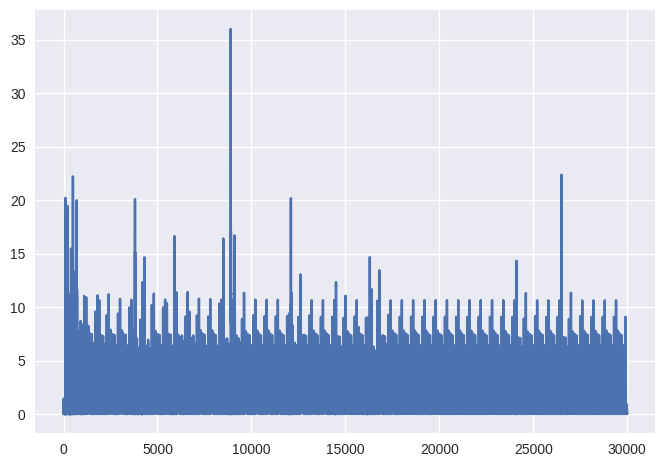

In [41]:
plt.plot(losses)

In [42]:
yhat

tensor([[14.4077, 15.0278, 15.5044, 20.0911, 14.1653, 13.9115]],
       device='cuda:0', grad_fn=<SumBackward1>)

In [43]:
data.y

tensor([3], device='cuda:0')